In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Loading data and first look.

In [2]:
df = pd.read_csv('ABMatchData(FULL).csv')
df.head()

,Opposition Name,Date,Result,Location,Opposition Debutants,Debutants,Opposition tries in last 5 games,Tries in last 5 games,Opposition Rating,Rating,Games since last loss
0,Canada,2003-10-17,62,Melbourne,0,1,9,28,65.62,89.80,8
1,Tonga,2003-10-24,84,Brisbane,1,1,13,31,70.08,89.80,9
2,Wales,2003-11-02,16,Sydney,0,0,17,37,76.92,89.80,10
3,South Africa,2003-11-08,20,Melbourne,0,0,28,44,81.84,89.80,11
4,Australia,2003-11-15,-12,Sydney,0,0,41,45,86.20,90.41,12


Let's see if there are null values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Opposition Name                   205 non-null    object 
 1   Date                              205 non-null    object 
 2   Result                            205 non-null    int64  
 3   Location                          205 non-null    object 
 4   Opposition Debutants              205 non-null    int64  
 5   Debutants                         205 non-null    int64  
 6   Opposition tries in last 5 games  205 non-null    int64  
 7   Tries in last 5 games             205 non-null    int64  
 8   Opposition Rating                 205 non-null    float64
 9   Rating                            205 non-null    float64
 10  Games since last loss             205 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 17.7+ KB


There's no null data.

Let's see type of data from columns in data frame.

In [4]:
df.dtypes

Opposition Name                      object
Date                                 object
Result                                int64
Location                             object
Opposition Debutants                  int64
Debutants                             int64
Opposition tries in last 5 games      int64
Tries in last 5 games                 int64
Opposition Rating                   float64
Rating                              float64
Games since last loss                 int64
dtype: object

As shown in previous cell, we realize that **Date** column has object type. We need data from this column in Date type for working better with this information in case we need. We'll use **to_datetime** Pandas function in order to achieve this. Then we'll extract month, year, day nad weekday from every date and we'll create new columns containing this information because this may be useful for doing some analysis.

In [5]:
df.Date = pd.to_datetime(df.Date)

In [6]:
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df['Day'] = df.Date.dt.day
df['Weekday'] = df.Date.dt.weekday

Now we'll analyze performance from All blacks from 2003 to 2018. A good starting point would be seeing how much wins and loses have this team. On dataframe, we have a column named **Results**: It has positive and negative values and some of them have '0' as value. It seems this column has the points of every match in favor of All Blacks which means that every positive result will be interpreted as a win for All Blacks, negative values as defeats and 0 as draws. We'll create a copy of this dataframe named **copy** (I know, it's very creative) for creating a new column which will contain strings showing us if the result of that match was a win, a defeat or a draw for All Blacks. This colum will be named **Result** and the existent **Result** column from our original dataframe will be named **Score**.

In [7]:
copy = df.copy()
copy.rename(columns={'Result':'Score'}, inplace=True)
copy['Result'] = 0
copy.Result[copy.Score > 0] = 'Win'
copy.Result[copy.Score == 0] = 'Draw'
copy.Result[copy.Score < 0] = 'Defeat'

<ipython-input-7-0c18dc158c67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy.Result[copy.Score > 0] = 'Win'


Text(0, 0.5, 'Count')

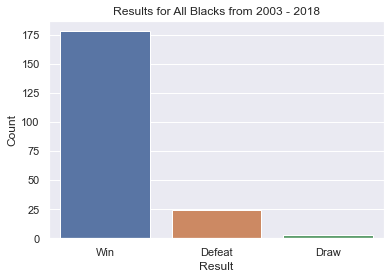

In [8]:
sns.countplot(x="Result", data=copy, )
plt.title('Results for All Blacks from 2003 - 2018')
plt.ylabel('Count')

Now we can see why All Blacks are considered for a lot of people as the best rugby team in world. We can see that they achieved a lot of victories from 2008 to 2013 and few defeats. They have won almost the 87% of their games played. They have inusual results which are draws: a very popular one (polemic indeed) is vs The British & Irish lions in 2017.

Let's explore more about those victories, defeats and draws. 

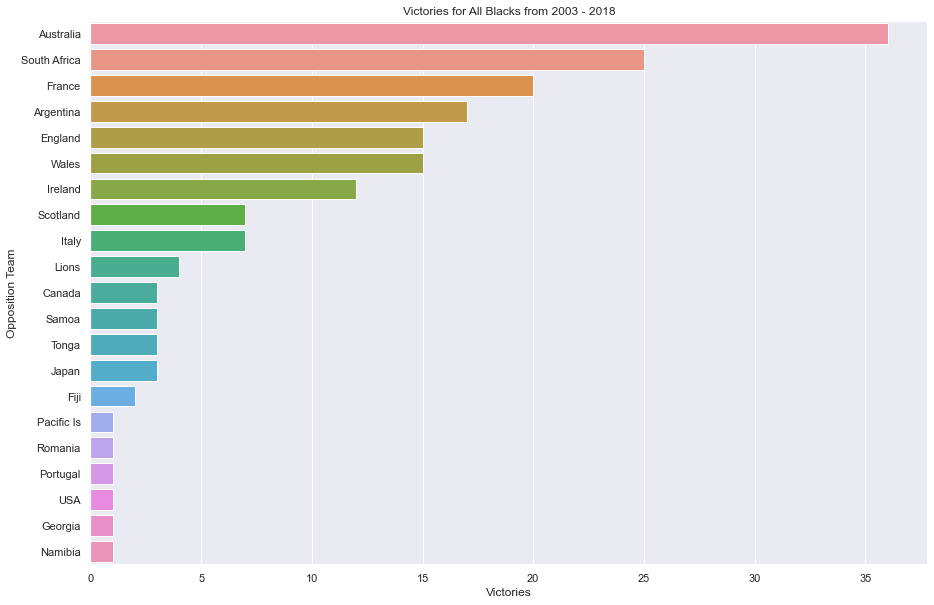

In [9]:
wins = df[df.Result > 0]
fig = plt.figure(figsize=(15,10))
sns.countplot(y='Opposition Name', data=wins, order=wins['Opposition Name'].value_counts().index)
plt.ylabel('Opposition Team')
plt.xlabel('Victories')
plt.title('Victories for All Blacks from 2003 - 2018')
plt.show()

As previous figure shows, **Australia** is the team which All Blacks have achivied more victories from 2003 to 2018. **South Africa** is the second one. It doesn't mean that, for saying something, Georgie is a stronger team than France because All Blacks have less victories with them. Something important to consider is the frequency of match against every team: Australia, South Africa and New Zealand have a tournament where only the three of them participate: that's the **Tri-Nations**. Then Argentina was added to the competition and it was called **The Rugby Championship**.

Now let's explore more about defeats of All Blacks.

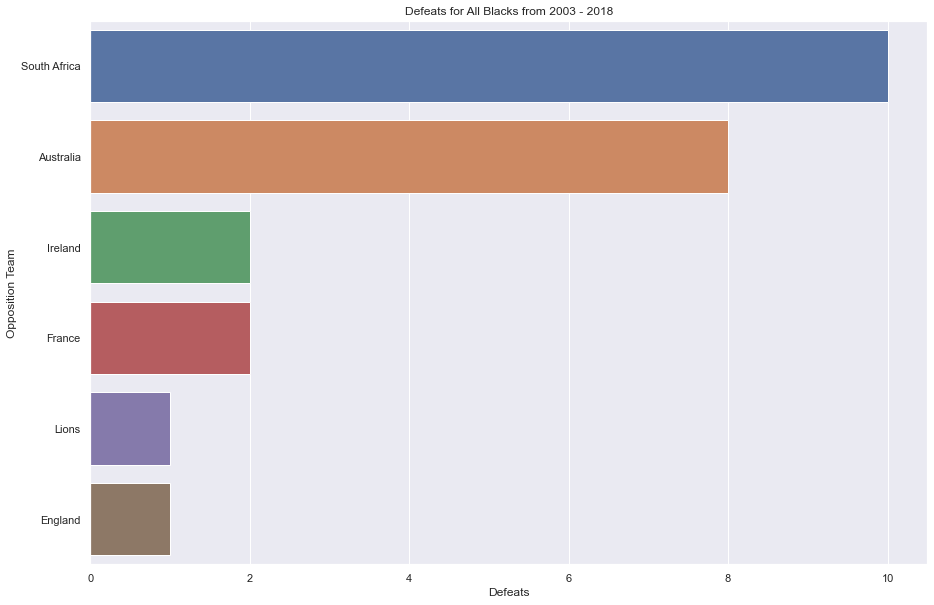

In [10]:
defeats = df[df.Result < 0]
fig = plt.figure(figsize=(15,10))
sns.countplot(y='Opposition Name', data=defeats, order=defeats['Opposition Name'].value_counts().index)
plt.ylabel('Opposition Team')
plt.xlabel('Defeats')
plt.title('Defeats for All Blacks from 2003 - 2018')
plt.show()

We can see All Blacks were most defeated by **South Africa** and **Australia**. The team was defeated by some european teams too.

Let's explore draws.

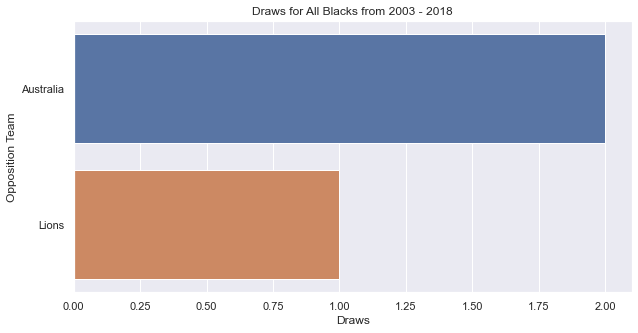

In [11]:
draws = df[df.Result == 0]
fig = plt.figure(figsize=(10,5))
sns.countplot(y='Opposition Name', data=draws, order=draws['Opposition Name'].value_counts().index)
plt.ylabel('Opposition Team')
plt.xlabel('Draws')
plt.title('Draws for All Blacks from 2003 - 2018')
plt.show()

All Blacks have draws with **Australia** and **The British and Irish Lions**.

Now let's see if there's any relationship between results and other variables in our dataframe. We'll start with **Debutants** and **Opposition Debutants**.

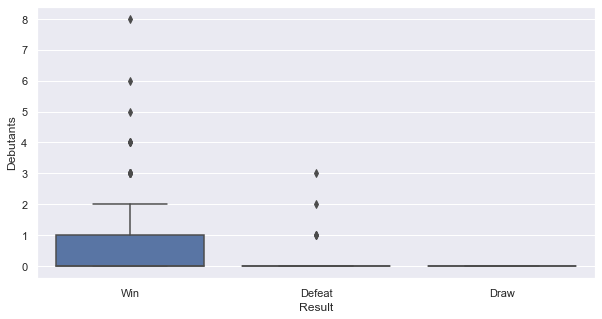

In [41]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x="Result", y="Debutants", data=copy)
plt.show()

The previous boxplot shows that maybe there's something to victories obtained and one debutant in matches. Let's see that with a bar plot. It would be interesting explore the matches wich All Blacks had a victory and there were more than 3 debutants. Perhaps that may not be important for our statistical analysis but I'm curious to see which was the opposition team when All Blacks had that quantity of debutants on their team (3 or more debutants may be a lot in international games).

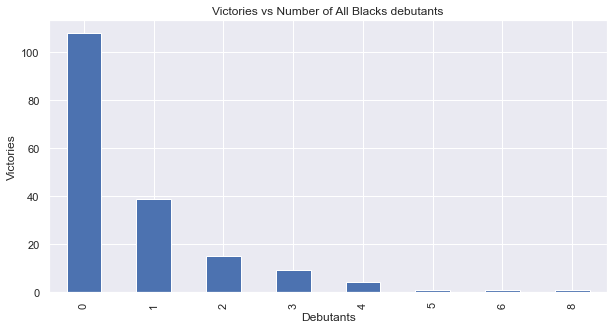

In [13]:
fig = plt.figure(figsize=(10,5))
copy[(copy.Result == 'Win')].Debutants.value_counts().plot(kind='bar')
plt.title('Victories vs Number of All Blacks debutants')
plt.xlabel('Debutants')
plt.ylabel('Victories')
plt.show()

We can see that maybe there's no relevance in the relationship between victories and number of debutants on All Blacks team. Besides, we'll need more information related to debutant's performance to conclude if that player was really important to achieve every victory. However, that would not be weird at all: All players on the All Blacks team play on New Zealand's rugby union tournament, Super Rugby. Although Crusaders team had been the champion these last years, all teams have a high level: every year there are new players in that tournament that surprise all the world. I recommend you watch the matchs from this tournament, they are very good. At least watch the highlights, please! haha.

Now let's see the victories with 3 or more debutants on All Blacks team:

In [14]:
copy[(copy.Result == 'Win') & (copy.Debutants >= 3)]

,Opposition Name,Date,Score,Location,Opposition Debutants,Debutants,Opposition tries in last 5 games,Tries in last 5 games,Opposition Rating,Rating,Games since last loss,Month,Year,Day,Weekday,Result
6,England,2004-06-12,33,Dunedin,1,3,17,31,90.56,90.12,2,6,2004,12,5,Win
14,Italy,2004-11-13,49,Rome,1,4,15,10,72.32,89.63,1,11,2004,13,5,Win
17,Fiji,2005-06-10,91,North Shore City,1,4,18,19,73.27,90.90,4,6,2005,10,4,Win
25,Wales,2005-11-05,38,Millennium Stadium,2,3,30,17,83.08,91.95,4,11,2005,5,5,Win
29,Ireland,2006-06-10,11,Hamilton,0,3,12,20,82.73,93.32,8,6,2006,10,5,Win
65,Scotland,2008-11-08,26,Murrayfield,0,3,5,28,76.92,92.42,6,11,2008,8,5,Win
71,Italy,2009-06-27,21,Christchurch,0,5,2,11,71.20,90.70,2,6,2009,27,5,Win
80,Italy,2009-11-14,14,Milan,0,3,2,9,71.20,90.53,4,11,2009,14,5,Win
83,Ireland,2010-06-12,38,New Plymouth,2,6,11,10,82.61,91.68,7,6,2010,12,5,Win
109,Ireland,2012-06-09,32,Auckland,3,3,13,21,79.85,91.43,8,6,2012,9,5,Win


Let's see if debutans on opposition team, have any relationship to results for All Blacks.

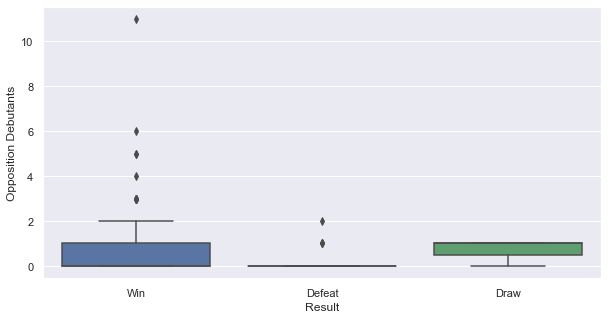

In [40]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x="Result", y="Opposition Debutants", data=copy)
plt.show()

It seems that there's no any important relationship between results and opposition debutants.

Now let's see locations where All Blacks have won their games.

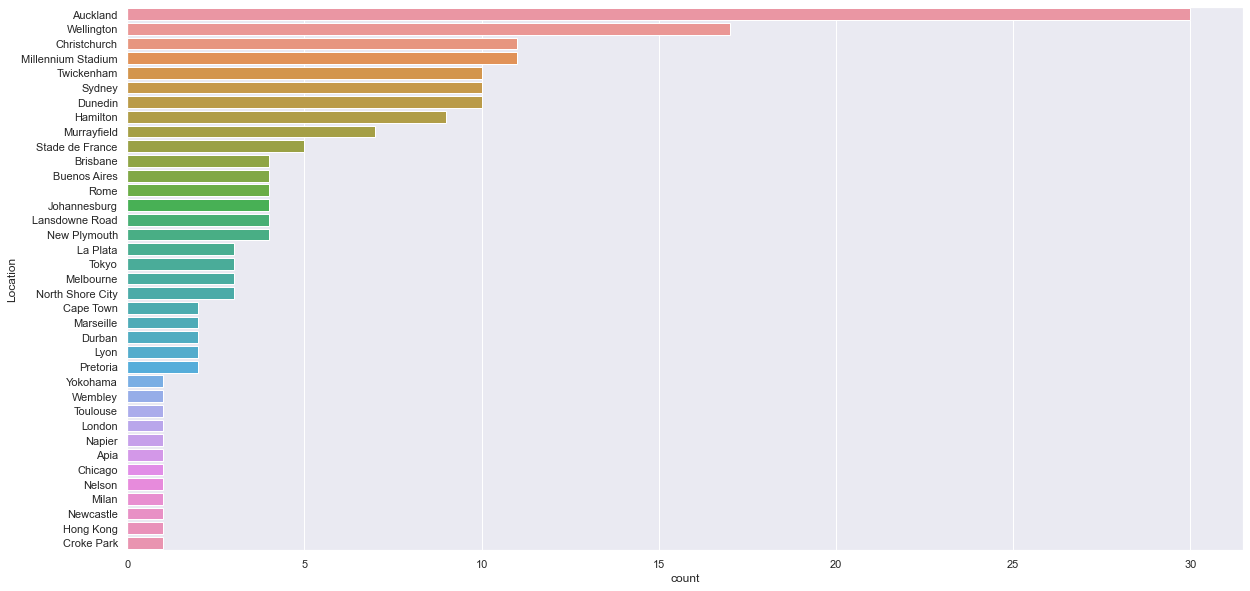

In [39]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='Location', data=wins, order=wins['Location'].value_counts().index)
plt.show()

It's not unusual that the three locations with most victories for All Blacks are cities from New Zealand. However, the next three locations are not from New Zealand. **Twickenham**  is a city from England and the **Millennium Stadium** is located on Wales. **Sydney** is located on Australia. Let's see a little more about these victories from these places.

In [20]:
copy[(copy.Result == 'Win') & (copy.Location == 'Millennium Stadium')]

,Opposition Name,Date,Score,Location,Opposition Debutants,Debutants,Opposition tries in last 5 games,Tries in last 5 games,Opposition Rating,Rating,Games since last loss,Month,Year,Day,Weekday,Result
15,Wales,2004-11-20,1,Millennium Stadium,0,2,24,13,76.94,89.63,2,11,2004,20,5,Win
25,Wales,2005-11-05,38,Millennium Stadium,2,3,30,17,83.08,91.95,4,11,2005,5,5,Win
41,Wales,2006-11-25,35,Millennium Stadium,0,0,22,20,76.87,94.59,4,11,2006,25,5,Win
67,Wales,2008-11-22,20,Millennium Stadium,0,0,11,28,79.58,92.42,8,11,2008,22,5,Win
79,Wales,2009-11-07,7,Millennium Stadium,0,1,11,9,80.74,90.17,3,11,2009,7,5,Win
96,Wales,2010-11-27,12,Millennium Stadium,0,0,6,18,77.04,93.19,4,11,2010,27,5,Win
121,Wales,2012-11-24,23,Millennium Stadium,0,0,5,22,78.95,92.91,20,11,2012,24,5,Win
150,Wales,2014-11-22,18,Millennium Stadium,0,0,18,24,79.94,93.70,5,11,2014,22,5,Win
158,Georgia,2015-10-02,33,Millennium Stadium,0,0,7,21,71.35,92.89,4,10,2015,2,4,Win
160,France,2015-10-17,49,Millennium Stadium,0,0,13,30,79.77,92.89,6,10,2015,17,5,Win


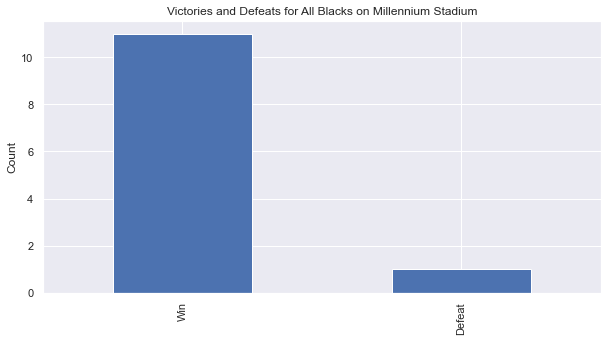

In [37]:
fig = plt.figure(figsize=(10,5))
copy[copy.Location == 'Millennium Stadium'].Result.value_counts().plot(kind='bar')
plt.title('Victories and Defeats for All Blacks on Millennium Stadium')
plt.ylabel('Count')
plt.show()

In [21]:
copy[(copy.Result == 'Win') & (copy.Location == 'Twickenham')]

,Opposition Name,Date,Score,Location,Opposition Debutants,Debutants,Opposition tries in last 5 games,Tries in last 5 games,Opposition Rating,Rating,Games since last loss,Month,Year,Day,Weekday,Result
27,England,2005-11-19,4,Twickenham,0,0,18,21,83.64,92.96,6,11,2005,19,5,Win
38,England,2006-11-05,21,Twickenham,3,1,4,13,79.64,92.91,1,11,2006,5,6,Win
68,England,2008-11-29,26,Twickenham,0,0,10,15,81.12,92.44,9,11,2008,29,5,Win
81,England,2009-11-21,13,Twickenham,0,0,8,9,81.08,90.53,5,11,2009,21,5,Win
93,England,2010-11-06,10,Twickenham,2,1,6,17,81.82,92.85,1,11,2010,6,5,Win
135,England,2013-11-16,8,Twickenham,0,0,17,23,86.31,93.20,13,11,2013,16,5,Win
148,England,2014-11-08,3,Twickenham,3,0,13,24,85.68,93.15,3,11,2014,8,5,Win
161,South Africa,2015-10-24,2,Twickenham,0,0,24,34,86.80,92.89,7,10,2015,24,5,Win
162,Australia,2015-10-31,17,Twickenham,0,0,23,34,91.75,93.67,8,10,2015,31,5,Win
202,England,2018-11-10,1,Twickenham,0,0,11,30,86.16,92.96,5,11,2018,10,5,Win


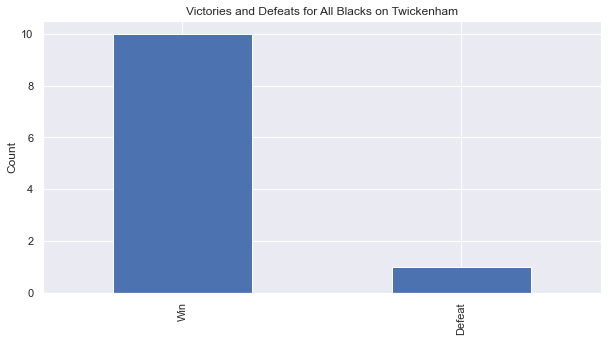

In [38]:
fig = plt.figure(figsize=(10,5))
copy[copy.Location == 'Twickenham'].Result.value_counts().plot(kind='bar')
plt.title('Victories and Defeats for All Blacks on Twickenham')
plt.ylabel('Count')
plt.show()

As shown before, we can see All Blacks are good winners as visitors at least on the Millennium Stadium and Twickenham. We would expect the opposition team on those places were Wales and England respectively, however, we can see another teams like **Georgia, France and South Africa**. Those matches belong to the **Rugby World Cup** celebrated on England in 2015 (we can check the date). The Millenium Stadium, in Cardiff (Wales), was one of the sports stages. All Blacks were the champions of that tournament.

Now let's see locations where All Blacks were defeated.

<AxesSubplot:xlabel='count', ylabel='Location'>

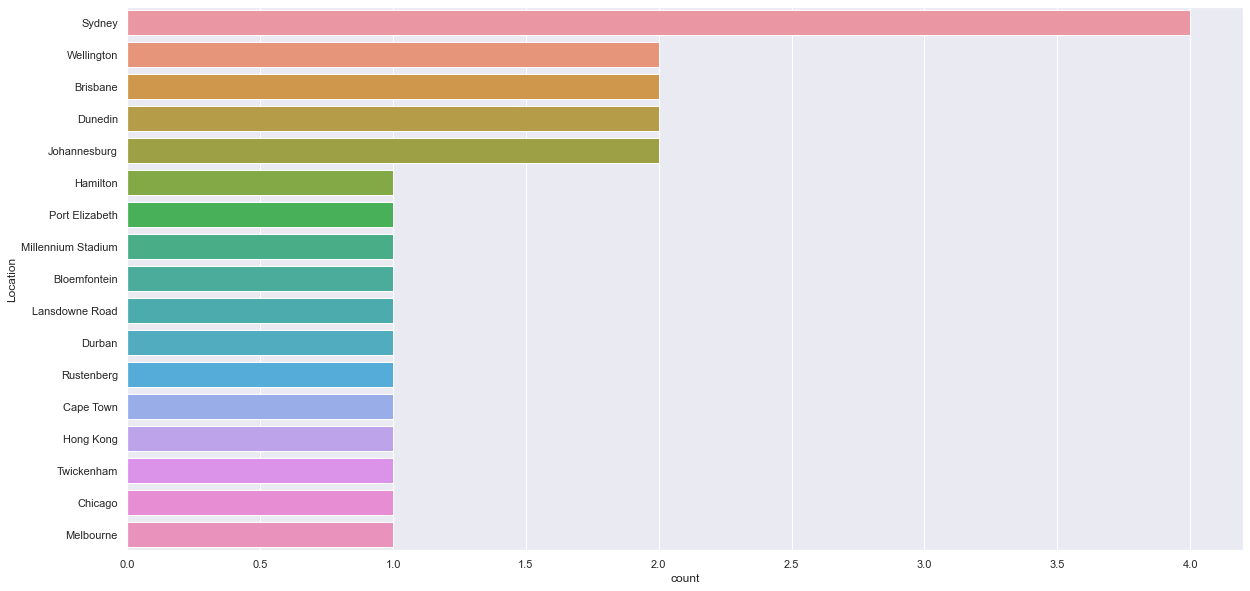

In [17]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='Location', data=defeats, order=defeats['Location'].value_counts().index)